In [1]:
import counter
import cellpose
import glob
import pandas as pd
import re # REEEEEE

from cellpose import models
from ipyfilechooser import FileChooser

REG = r'_([A-Z][0-9]{2})_'

def make_chooser(title='Choose File'):
    fc = FileChooser()
    fc.show_hidden = True
    fc.use_dir_icons=True
    fc.show_only_dirs=True
    fc.title=title
    return fc

in_fc = make_chooser('Input Directory')
out_fc = make_chooser('Output Directory')
display(in_fc)
display(out_fc)

FileChooser(path='/hdd/project/cell_counting', filename='', title='HTML(value='Input Directory')', show_hidden…

FileChooser(path='/hdd/project/cell_counting', filename='', title='HTML(value='Output Directory')', show_hidde…

In [3]:
in_dir = in_fc.selected_path
out_dir = out_fc.selected_path

model = models.Cellpose(gpu=True, model_type='cyto')

DATANAME = 'data.csv' # output datafilename
DIMS = None # diameter of cell leave none for standard cyto size

dirs = glob.glob(in_dir)

df = counter.gen_df(dirs, model, REG)

df.to_csv(out_dir+DATANAME, index=False)

** TORCH CUDA version installed and working. **
>>>> using GPU

Getting data from /hdd/project/cell_counting/data/INS1_BF/10000

processing 1 image(s)
computing styles from images
time spent: running network 0.82s; flow+mask computation 15.84
estimated cell diameters for 1 image(s) in 17.81 sec
>>> diameter(s) =  [33.03280627]
time spent: running network 2.90s; flow+mask computation 11.87
estimated masks for 1 image(s) in 14.84 sec
>>>> TOTAL TIME 32.65 sec
processing 1 image(s)
computing styles from images
time spent: running network 1.15s; flow+mask computation 18.05
estimated cell diameters for 1 image(s) in 20.30 sec
>>> diameter(s) =  [30.73668398]
time spent: running network 3.46s; flow+mask computation 11.16
estimated masks for 1 image(s) in 14.69 sec
>>>> TOTAL TIME 34.99 sec
processing 1 image(s)
computing styles from images
time spent: running network 0.98s; flow+mask computation 21.26
estimated cell diameters for 1 image(s) in 23.35 sec
>>> diameter(s) =  [32.31185601]
time 

time spent: running network 2.78s; flow+mask computation 7.17
estimated masks for 1 image(s) in 10.01 sec
>>>> TOTAL TIME 23.34 sec
processing 1 image(s)
computing styles from images
time spent: running network 0.96s; flow+mask computation 13.18
estimated cell diameters for 1 image(s) in 15.22 sec
>>> diameter(s) =  [34.24403044]
time spent: running network 2.85s; flow+mask computation 7.45
estimated masks for 1 image(s) in 10.36 sec
>>>> TOTAL TIME 25.57 sec
processing 1 image(s)
computing styles from images
time spent: running network 0.84s; flow+mask computation 16.76
estimated cell diameters for 1 image(s) in 18.74 sec
>>> diameter(s) =  [34.92511251]
time spent: running network 3.03s; flow+mask computation 9.93
estimated masks for 1 image(s) in 13.03 sec
>>>> TOTAL TIME 31.77 sec
processing 1 image(s)
computing styles from images
time spent: running network 1.17s; flow+mask computation 21.22
estimated cell diameters for 1 image(s) in 23.48 sec
>>> diameter(s) =  [30.42441699]
time

time spent: running network 2.83s; flow+mask computation 10.30
estimated masks for 1 image(s) in 13.18 sec
>>>> TOTAL TIME 35.52 sec
processing 1 image(s)
computing styles from images
time spent: running network 0.98s; flow+mask computation 20.75
estimated cell diameters for 1 image(s) in 22.83 sec
>>> diameter(s) =  [32.37091511]
time spent: running network 3.40s; flow+mask computation 11.78
estimated masks for 1 image(s) in 15.24 sec
>>>> TOTAL TIME 38.08 sec
processing 1 image(s)
computing styles from images
time spent: running network 0.96s; flow+mask computation 14.87
estimated cell diameters for 1 image(s) in 16.89 sec
>>> diameter(s) =  [34.18821291]
time spent: running network 2.77s; flow+mask computation 8.06
estimated masks for 1 image(s) in 10.88 sec
>>>> TOTAL TIME 27.77 sec
processing 1 image(s)
computing styles from images
time spent: running network 0.96s; flow+mask computation 17.14
estimated cell diameters for 1 image(s) in 19.20 sec
>>> diameter(s) =  [33.052073]
time

In [6]:
########## Change these ############
####################################
index = 'well' # A-P
values = 'counts' # count
columns = 'wellNum' # 1-26
heatmap_name = 'testname' # name of heatmap
####################################

AttributeError: 'AxesSubplot' object has no attribute 'sns_title'

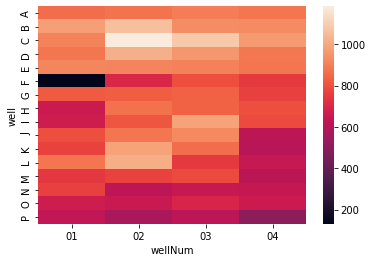

In [10]:
dt = df
dt[[index, columns]] = df['wellID'].str.extract('([A-Z])([0-9]{2})',expand=True)
dt['counts'] = dt['counts'].astype('int')
counter.gen_boxplot(df, index=index, vals=values, cols=columns, name=out_dir+heatmap_name)